In [16]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt # 绘图工具
import matplotlib
from sklearn.manifold import TSNE # 用于将高维数据转换到低维空间中，同时尽量保持数据在高维空间中的结构特性

T-SNE 可以将高维度的数据映射到 2D 或 3D 的空间中, 以便我们可以直观地观察和理解数据的结构

# 1.读取数据

In [18]:
# 读取评论向量化的结果集
df = pd.read_csv('data/评论的向量画结果集.csv')
# print(df['embedding'][0])
print(type(df['embedding'][0]))

<class 'str'>


In [19]:
# 把str转换成矩阵
df['embedding_vec'] = df['embedding'].apply(ast.literal_eval)
print(len(df['embedding_vec'][0]))
print(type(df['embedding_vec'][0]))

1536
<class 'list'>


In [20]:
# 判断embedding_vec列的所有向量是否具有相同的长度
isSame = df['embedding_vec'].apply(len).nunique() == 1
print(isSame)

True


# 2.T-SNE化

In [21]:
# 转数组
matrix = np.vstack(df['embedding_vec'].values)
matrix

array([[ 7.73470430e-03, -2.51515023e-02,  1.12386346e-02, ...,
        -7.43985269e-03, -2.18875669e-02, -3.71649787e-02],
       [-2.74980022e-03, -1.13321142e-02, -3.02070030e-03, ...,
        -1.01375422e-02, -2.53764936e-03, -6.73007453e-03],
       [-1.69153884e-02, -1.31416717e-04, -1.27369249e-02, ...,
        -1.43491942e-02, -3.96886878e-02, -2.17521954e-02],
       ...,
       [-1.01307854e-02, -8.28104466e-03, -8.11647717e-03, ...,
        -3.11230347e-02, -8.01115390e-03, -1.62724499e-02],
       [-3.62571049e-03,  1.08735176e-05,  2.83541642e-02, ...,
        -6.29042881e-03, -1.34343486e-02, -2.45883763e-02],
       [-4.85348934e-03, -1.60658285e-02, -2.57598306e-03, ...,
        -2.91468911e-02, -1.50276488e-02, -2.24376563e-02]])

In [22]:
# 创建t-sne模型
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)

In [23]:
# 使用t-sne模型降维，得到一个二维的
matrix_2d = tsne.fit_transform(matrix)
matrix_2d

array([[ 11.009294 ,  15.715658 ],
       [ 11.535578 , -37.481087 ],
       [-35.892113 ,  45.436775 ],
       ...,
       [ 49.90143  ,  19.138323 ],
       [-17.05342  , -51.86057  ],
       [ -7.1301866, -44.626617 ]], dtype=float32)

# 3.可视化

In [24]:
# 根据不同的颜色来区分不同的评分 ["红色", "深橙色", "金色", "青绿色", "深绿色"]
colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]

In [29]:
x = matrix_2d[:, 0]
y = matrix_2d[:, 1]
#print(x)
print(y)

[ 1.57156582e+01 -3.74810867e+01  4.54367752e+01 -4.04686546e+00
  4.65255852e+01  3.86031151e+01  2.17118320e+01  1.72449398e+01
  3.91514511e+01  1.23238907e+01 -4.21802597e+01  2.15903854e+01
 -2.97251046e-01  1.74651897e+00  1.32971478e+01 -4.59360123e+00
 -4.81722450e+00  2.61957893e+01  2.62511501e+01  2.95150375e+01
 -4.14662895e+01  3.05817451e+01  3.06630745e+01  3.47497330e+01
 -5.04193954e+01  4.60664444e+01 -6.81589890e+00 -1.59781504e+01
  2.93376980e+01  7.20620632e+00  1.81255760e+01  2.55935516e+01
 -3.04887104e+01  1.42516890e+01  2.09925785e+01  2.80405750e+01
 -7.46504974e+00  1.69411411e+01 -1.39760942e+01 -1.62085686e+01
  2.52276440e+01  5.23376389e+01  1.31261463e+01  2.18524456e+01
  3.45739822e+01  1.27939272e+01 -1.56459351e+01 -9.50284195e+00
  1.93116131e+01 -2.53775539e+01 -1.55592175e+01  1.65856628e+01
  3.35883293e+01  3.87227440e+01  2.13037872e+01  2.07770519e+01
  7.54319048e+00  4.45562897e+01  1.88900852e+01 -1.00277078e+00
  3.68385582e+01 -1.63042

In [26]:
# 评分是从1开始的，（减1是因为评分是从1开始的，而颜色索引是从0开始的）获取对应的颜色索引
colors_indices = df.Score.values - 1
color_map = matplotlib.colors.ListedColormap(colors)

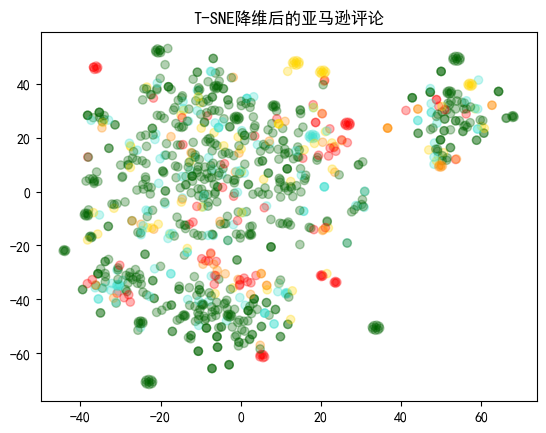

In [40]:
# 画出一个散点图
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
plt.scatter(x=matrix_2d[:, 0], y=matrix_2d[:, 1], c=colors_indices, cmap=color_map, alpha=0.3)
plt.title("T-SNE降维后的亚马逊评论")
plt.show()

In [41]:
# 读取所有可用的中文字体
import matplotlib.font_manager

def list_chinese_fonts():
    # 获取所有可用的字体名称
    fonts = matplotlib.font_manager.fontManager.ttflist
    # 过滤出支持中文的字体
    chinese_fonts = [f.name for f in fonts if 'SimHei' in f.name or 'FangSong' in f.name]
    # 打印支持中文的字体名称
    for font in chinese_fonts:
        print(font)

# 调用函数
list_chinese_fonts()

SimHei
FangSong
